In [42]:
# hide
from pathlib import Path
import pandas as pd
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [72]:
# hide
DATA_DIR = Path('data')
def load(filename):
    f = open(DATA_DIR/filename,"rb")
    return pickle.load(f)
    
def save(data, filename):
    with open(DATA_DIR/filename, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

party_colors = {
  'CDA':'#5cb957',
  'ChristenUnie':'#00a5e8',
  'D66':'#04a438',
  'GroenLinks':'#48a641',
  'PVV':'#002759',
  'PvdA':'#df111a',
  'PvdD':'#006b2d',
  'SGP':'#d86120',
  'SP':'#e3001b',
  'VVD':'#ff7f0e',
  'DENK':'#17becf',
  'FVD':'#800000',
  'Groep Krol/vKA':'pink',
  '50PLUS':'#93117e'}

parties = ['VVD',
 'CDA',
 'ChristenUnie',
 'D66',
 'SGP',
 'FVD',
 '50PLUS',
 'PVV',
 'PvdA',
 'DENK',
 'GroenLinks',
 'SP',
 'PvdD']

parties = [ 'PvdA',
 'GroenLinks',
 'SP',
 'PvdD']

In [52]:
# hide
df = load('df_including_topics_full.pickle')

In [53]:
df = df[df['Kamer']=='Rutte III']
len(df)

11448

In [54]:
df = df[df['Voor']!=150]
len(df)

9879

In [153]:
G = nx.Graph()

def get_same_vote_percentage(party1, party2):
    return round(sum(df['Stem_'+party1]==df['Stem_'+party2]) / len(df)*100)
for p1 in parties:
    for p2 in parties:
        if p1 != p2 and p1<p2:
            G.add_edge(p1,p2,weight=get_same_vote_percentage(p1,p2))
            color_map = [party_colors[node] for node in G]

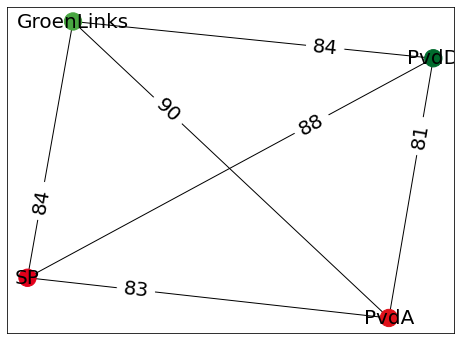

In [131]:

pos=nx.spring_layout(G,scale=0.01) # pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(8,6))
nx.draw_networkx(G,pos, font_size=20, node_color=color_map)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,label_pos=0.3, font_size=20)
plt.gcf()
plt.savefig('links_relaties.png')
# plt.draw()

In [152]:
overall_topic_counts = df['Topic'].value_counts()
def get_disagreement_topics(party1, party2):
    print('\n',party1,party2)
    print((df[df['Stem_'+party1]!=df['Stem_'+party2]]['Topic'].value_counts() / overall_topic_counts).sort_values()[-5:])
for p1 in parties:
    for p2 in parties:
        if p1 != p2 and p1<p2:
            get_disagreement_topics(p1,p2)


 PvdA SP
Landbouw & dierenwelzijn    0.180723
Algemene zaken              0.187316
Financiele sector           0.188372
Pensioenstelsel             0.299160
Europese Unie               0.343470
Name: Topic, dtype: float64

 PvdA PvdD
Pensioenstelsel             0.206723
Openbaar vervoer            0.259494
Financiele sector           0.262791
Landbouw & dierenwelzijn    0.280120
Europese Unie               0.372093
Name: Topic, dtype: float64

 GroenLinks PvdA
Algemene zaken              0.122419
Milieu & regelgeving        0.124194
Klimaat & energie           0.124498
Openbaar vervoer            0.155063
Landbouw & dierenwelzijn    0.167169
Name: Topic, dtype: float64

 GroenLinks SP
Zorg                 0.172277
Financiele sector    0.179070
Openbaar vervoer     0.193038
Pensioenstelsel      0.321008
Europese Unie        0.338104
Name: Topic, dtype: float64

 GroenLinks PvdD
Zorg                        0.168317
Landbouw & dierenwelzijn    0.194277
Pensioenstelsel             0.19495